# Sentiment Analysis of Tweet CSV

<br><br>
In this repositories, we want to classify from twitter tweets, if people has positive sentiment or negative. In general, our work process is :
<br><br>

1. Importing necessary modules and packages
2. Data preprocessing, which itself divided by :
    - Data Explaratory Analysis
    - Removing Null values
    - Removing stopwords
    - Word lemmatization
    - Data Visualization (using **Target** column)
    - exporting data to csv
3. Data sampling
4. Data Split to train and test
5. count vectorizer (to change text data to numeric using weight)
6. Modelling
7. Conclusion

<br>
<br>
Part 1-2 will be in this python files, and part 3-7 will be on the next python files. 
<br><br>

**Notes**

<br>
We split python files because when we model our data, it takes to long and sometimes, a loop happens and we have to restart the jupyten notebook kernel. And so, we split our python file to make it easier and faster when there are error in our modelling process

### 1. Importing Modules
First, we import the necesary modules

In [1]:
# Import necesary modules for data
import pandas as pd
import numpy as np

#import sklearn for model evaluation 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#import visualization module 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS



#import nltk for natural language toolkit
import nltk 
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet

# nltk.download('stopwords')  -- We already Download it, feel free to run if you haven't
from nltk.corpus import stopwords


#import string, regex, , uniqcode     -- Used for preprocess user's tweet 
import re, string, unicodedata

#import visualization module 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

#import tqdm -- Used for dataframe.progress.apply(..) --> show progress bar when ... is a user defined function
from tqdm import tqdm 
tqdm.pandas()

#import beaurtiful soup     -- Used for reading our HTML text
from bs4 import BeautifulSoup


<br><br>
We import our data *clean_tweet.csv*

In [2]:
data = pd.read_csv('clean_tweet.csv')
data.head()

,text,target
0,awww that s a bummer you shoulda got david car...,0
1,is upset that he can t update his facebook by ...,0
2,i dived many times for the ball managed to sav...,0
3,my whole body feels itchy and like its on fire,0
4,no it s not behaving at all i m mad why am i h...,0


<br><br>
In our data, 0 means negative sentiment and 1 means positive sentiment

### 2. Model Preprocessing

Looks like our *text* column already been mini-cleaned. There are still stopwords and some past tense verbs in data. Next, we want to see how many data there are and how many null values

In [3]:
print('Number of null values ')
print(data.isnull().sum())

print('\nData Info')
print(data.info())

Number of null values 
text      3247
target       0
dtype: int64

Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
text      1596753 non-null object
target    1600000 non-null int64
dtypes: int64(1), object(1)
memory usage: 24.4+ MB
None


<br><br>
There are null values in our *text* column, that is 3247 null values. We dropped these null values as there are only a fraction of our data

In [4]:
data=data.dropna()
data.isnull().sum()

text      0
target    0
dtype: int64

<br><br>
Now there aren't any null values and we are ready to the data preprocessing

### 2. Data Preprocessing


<br>
We remove non_ascii text (to make sure) our data is cleaned

In [5]:
#cleansing 
def preprocessing(text):
    def strip_html(text):
        soup = BeautifulSoup(text, "html.parser")
        return soup.get_text()
    def remove_non_ascii(text):
        return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    
    text = remove_non_ascii(text)
    
    return text.lower()

In [6]:
df=data.copy()

df['text'] = df['text'].progress_apply(preprocessing)
df.head()

100%|████████████████████████████████████████████████████████████████████| 1596753/1596753 [00:05<00:00, 278764.60it/s]


,text,target
0,awww that s a bummer you shoulda got david car...,0
1,is upset that he can t update his facebook by ...,0
2,i dived many times for the ball managed to sav...,0
3,my whole body feels itchy and like its on fire,0
4,no it s not behaving at all i m mad why am i h...,0


In [7]:
df.text.head().tolist()

['awww that s a bummer you shoulda got david carr of third day to do it d',
 'is upset that he can t update his facebook by texting it and might cry as a result school today also blah',
 'i dived many times for the ball managed to save the rest go out of bounds',
 'my whole body feels itchy and like its on fire',
 'no it s not behaving at all i m mad why am i here because i can t see you all over there']

<br><br>
We see that many non-present tense verb and also there are still stopwords. First we remove stopwords by using *stopwords.words('english')* which is a collection of english's stop words. If there are word that is in this *stopwords*, then it will not be included in our data.

In [8]:
# preprocess data
df=data.copy()
#stopword 
stop = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df.text.head().tolist()

['awww bummer shoulda got david carr third day',
 'upset update facebook texting might cry result school today also blah',
 'dived many times ball managed save rest go bounds',
 'whole body feels itchy like fire',
 'behaving mad see']

<br>
<br>
Tadaa! there aren't any stopwords left. Now we are trying to convert each verb into its base form. We are using lemmmatize as it will convert into base form, unlike stemming which sometimes, make words into an recognizable words. <br>
First, we tokenize our data, which is basicaly means spliting each words in sentences

In [9]:
a=[]
for sentence in df.text:
    words = nltk.word_tokenize(sentence)
    a.append(words)
a[0:2]

[['awww', 'bummer', 'shoulda', 'got', 'david', 'carr', 'third', 'day'],
 ['upset',
  'update',
  'facebook',
  'texting',
  'might',
  'cry',
  'result',
  'school',
  'today',
  'also',
  'blah']]

<br><br>
Now, we are ready to use lemmatizer. First we define lemmatizer function

In [10]:
def a_lemmatizer(lemmatizer, word, pos):
    word=lemmatizer.lemmatize(word, pos)
    return word
lemmatizer = WordNetLemmatizer()

<br><br>
Then, we lemmatize each word in each list of list. Noted that we do not use .apply function as it's list of list

In [11]:
b=[]
for row in a:
    c=[]
    for string in row:
        c.append(a_lemmatizer(lemmatizer, word = string, pos = wordnet.VERB))
    b.append(c)
b[0:2]


[['awww', 'bummer', 'shoulda', 'get', 'david', 'carr', 'third', 'day'],
 ['upset',
  'update',
  'facebook',
  'texting',
  'might',
  'cry',
  'result',
  'school',
  'today',
  'also',
  'blah']]

<br><br>
Now, you see each verb turned into verb base.<br>

After lemmatizer, we join each list of list into one row again

In [12]:
c=[]
for row in b:
    c.append(" ".join(row))
c[0:2]
df['text']=c
df.head()

,text,target
0,awww bummer shoulda get david carr third day,0
1,upset update facebook texting might cry result...,0
2,dive many time ball manage save rest go bound,0
3,whole body feel itchy like fire,0
4,behave mad see,0


<br><br>
After lemmatizer, see output below

In [14]:
freq=df['text'].value_counts()
unimportant=[]
for ind in freq.index:
    if len(ind)<2:
        unimportant.append(ind)
print(unimportant[:5])
print('Count of One char in data : ',len(unimportant))
        

['', 'u', 'x', 'k', 'f']
Count of One char in data :  18


<br><br>
We deleted data that contains those words, as it doesn't mean anything and could be product of typos. 

In [15]:
df2=df.copy()

In [16]:
df2['text'] = df2['text'].apply(lambda x: " ".join(x for x in x.split() if x not in unimportant))
df2['text'].head()


0         awww bummer shoulda get david carr third day
1    upset update facebook texting might cry result...
2        dive many time ball manage save rest go bound
3                      whole body feel itchy like fire
4                                       behave mad see
Name: text, dtype: object

<br><br>
Now, our data is cleaned. **NOTED** : Normaly, we have correct any typos in our data. But it takes to much time and we see that our time is more valuable (lol).  

In [17]:
df3=df2.copy()
df3.shape

(1596753, 2)

<br><br>
Our data still doesn't change. Next we want to visualize our text data

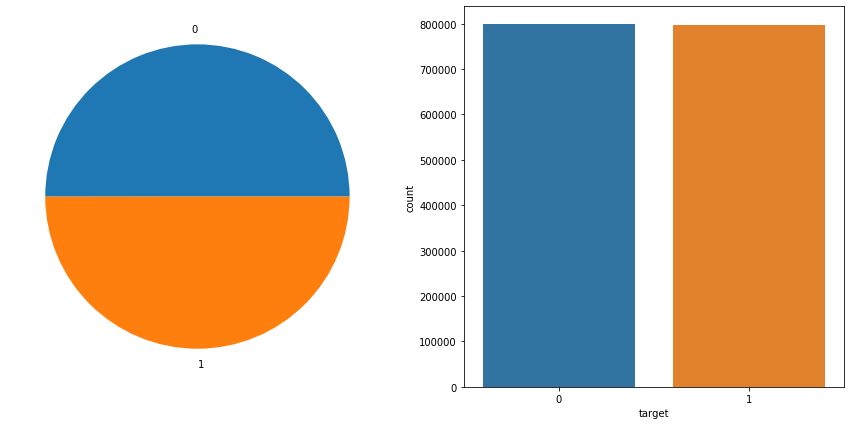

In [18]:
f=plt.figure(figsize=(15,7))

f.add_subplot(1,2,1)
count = df3['target'].value_counts()
plt.pie(count,labels=count.index)

f.add_subplot(1,2,2)
sns.countplot(df3['target'])

plt.show()

<br><br>
We see that our data quite balance. Imbalanced data can be a problem as it will makes our model more prefer to classify new data to majority label. 
<br><br>
We want to visualize more by using word cloud. Notes that it takes many memory tu run word cloud and so we only use a fraction of our data

In [19]:
pos=df3[df3['target']==1]
neg=df3[df3['target']==0]
pos_sampling = pos.sample(frac=0.1).reset_index().drop(columns='index')
neg_sampling = neg.sample(frac=0.1).reset_index().drop(columns='index')

print(pos_sampling.shape)
print(neg_sampling.shape)
pos_sampling.head()


(79825, 2)
(79850, 2)


,text,target
0,ah hear hope everything work out,1
1,kennedy say racist,1
2,care love jay leno wait till show fall cool co...,1
3,hi nice see twitter hot hell arizona,1
4,mom like milow version ayo technology good thi...,1


<br><br>
We use 10% of positive and negative. Then, we append each sentiment into one dataframe

In [20]:
data2=pd.DataFrame()
data2=pos_sampling.append(neg_sampling,ignore_index=True)

data2['target'].value_counts()

0    79850
1    79825
Name: target, dtype: int64

<br><br>
You can see that each value_counts still balanced. Now, we use word_cloud to each sentiments

In [21]:
#define happy and not happy 
happy = df3[df3['target'] == 1]
not_happy  = df3[df3['target'] == 0]

In [22]:
#merge all the happy comments into one paragraph
all_description_happy = "".join(happy.text.values)
all_description_not_happy = "".join(not_happy.text.values)

In [23]:
#text = happy.Description
#make a wordcloud 
def create_word_cloud(string):
    cloud = WordCloud(background_color = "white", max_words = 30, stopwords = set(STOPWORDS)).generate(string)
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

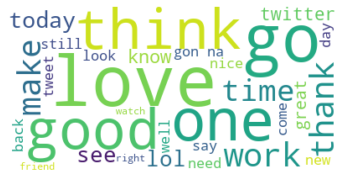

In [24]:
#happy 
create_word_cloud(all_description_happy)

<br><br>
By using word_cloud, we can see frequent words that appear in positive sentiment and negative sentiment. in positive sentiment, LOVE, GOOD, GO, THANK, ONE and many more. One kinda suspicious as it doesnt means any positive words

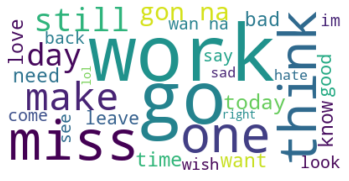

In [25]:
#nothappy
create_word_cloud(all_description_not_happy)

<br><br>
In negative sentiment, words that are frequent are WORK, GO, THINK, MISS and others. It make sense that these words kinda represent bad sentiment

In [26]:
#df3.to_csv('df3.csv')

<br><br>
After we clean our data, we export it into csv to further used in our model development. 

<br>

## What we done

<br>
We already clean our data by using stopwords removal and lemmatization. In the next file we will build which model is the best.